# Описание проекта

Имеется в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представлны данные до 2016 года. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Цель исследования

1. Определить закономерности, определяющие успешность игры в целом и по регионам
2. Попытаться дать основания для прогноза на 2017 год по имеющимся данным (данные даны за весь период, необходимо для начала выделить актуальный)

# Ход работы
Даны датасет `games.csv`, содержащий данные об играх, годе выпуска, жанре, платформах, на которых они выпущены, оценках пользователей и критиков, продаж по регионам (северная америка, европа, япония и др.), рейтинге по системе ESRB. О качестве данных ничего неизвестно, поэтому сначала необходимо проверить наличие в них пропусков, дубликатов. 

Проверив данные на эти аномалии, надо постараться исправить их, выяснить влияние ошибок и исправлений на результаты.

Далее идёт исследовательский анализ данных. Для анализа нужно будет определить актуальный период, а после этого уже рассчитывать необходимые данные. 

Итого, в исследовании можно выделить следующие шаги:
- загрузка и обзор данных
- предобработка данных
- расчеты и добавление необходимых элементов к исходным датасетам
- получение актуального периода
- получение необходимых срезов и расчеты по ним
- анализ статистических гипотез и формулировка выводов
- формовка общего вывода и предложений дальнейшей работе

# Описание данных
- **`Name`** — название игры
- **`Platform`** — платформа
- **`Year_of_Release`** — год выпуска
- **`Genre`** — жанр игры
- **`NA_sales`** — продажи в Северной Америке (миллионы проданных копий)
- **`EU_sales`** — продажи в Европе (миллионы проданных копий)
- **`JP_sales`** — продажи в Японии (миллионы проданных копий)
- **`Other_sales`** — продажи в других странах (миллионы проданных копий)
- **`Critic_Score`** — оценка критиков (максимум 100)
- **`User_Score`** — оценка пользователей (максимум 10)
- **`Rating`** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Знакомство с данными

Импортируем датасет в переменную `games` и выводим первые 5 строк на экран

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import missingno as msno

games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведу информацию о датафрейме и сразу количество пропусков по столбцам, чтобы оценить масшатбы трагедии

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

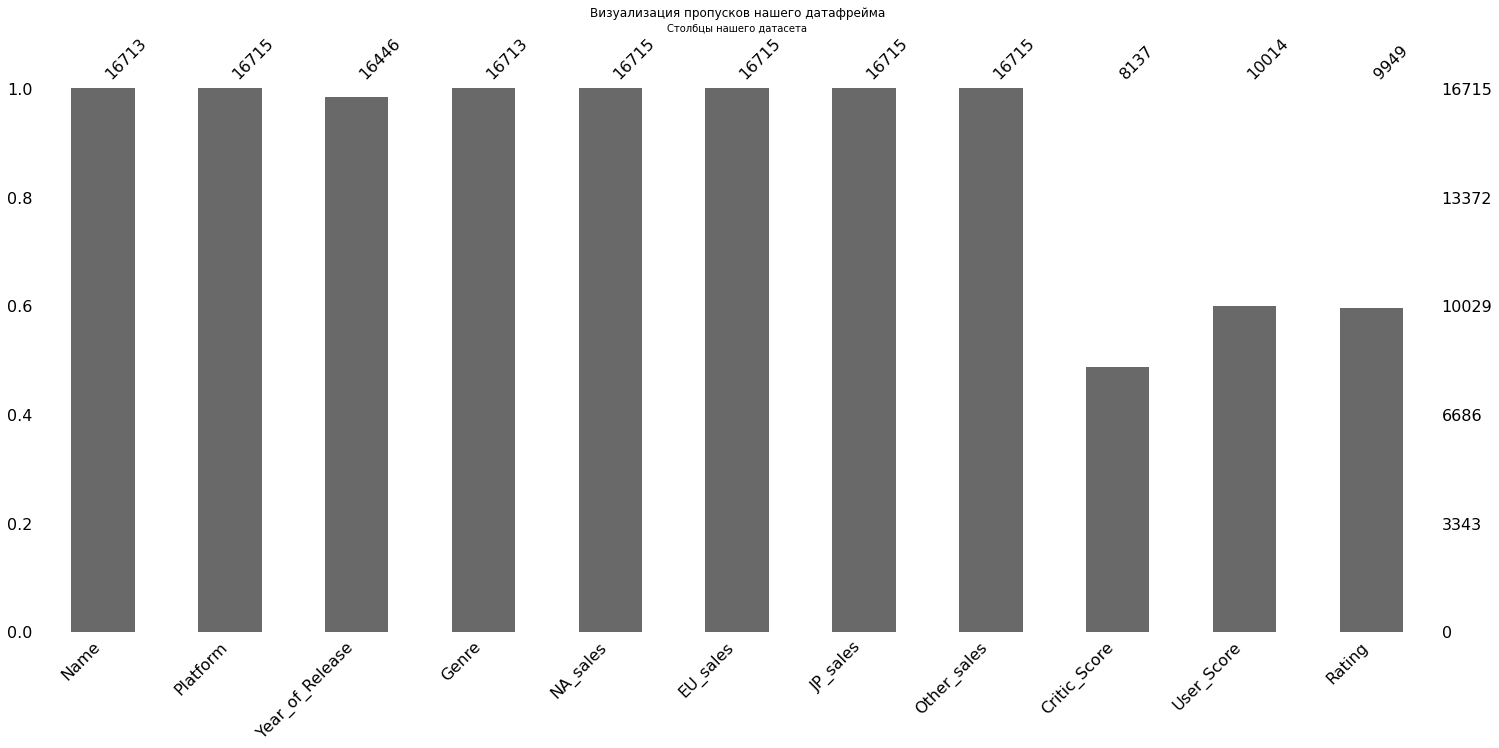

In [5]:
msno.bar(games)
plt.xlabel('Столбцы нашего датасета')
plt.ylabel('Процент имеющихся данных (не пропущенных)')
plt.title('Визуализация пропусков нашего датафрейма')
plt.show()

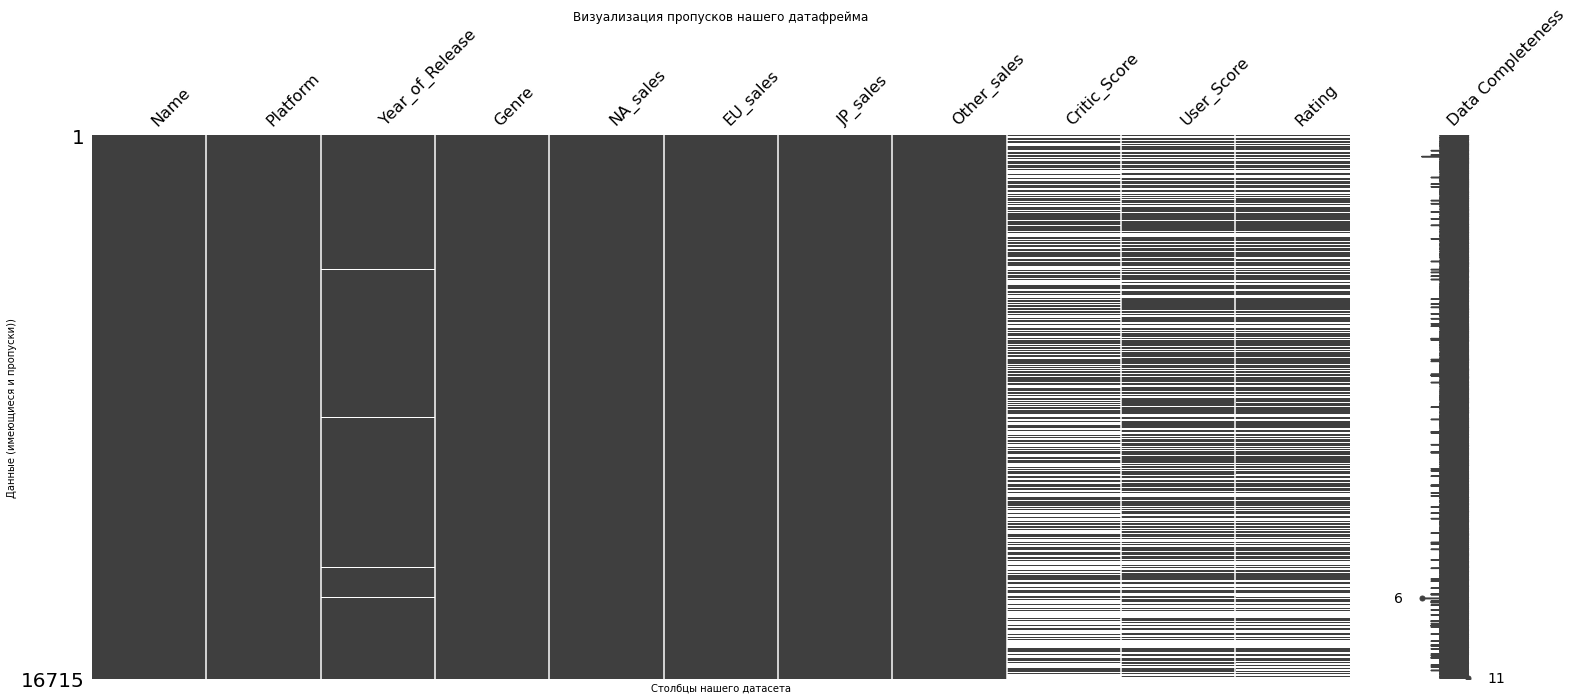

In [6]:
msno.matrix(games, labels = True)
plt.xlabel('Столбцы нашего датасета')
plt.ylabel('Данные (имеющиеся и пропуски))')
plt.title('Визуализация пропусков нашего датафрейма')
plt.show()

### **Промежуточный итог 1**
- Видно, что в датафрейме 16715 строк, 11 столбцов. 
- Есть столбцы со странным типом данных:
    - `year_of_release` у нас не целочисленный, а с плавающей точкой
    - `user_score` вообще строковый, а не числовой (не вещественный)
    - вызывает сомнения также `critic_score`, может быть он должен быть целочисленный, но стоит разобраться с ним подробнее

- Также видно, что есть пропуски в столбцах `name`,`year_of_release`,`genre`, `critic_score`, `user_score`,`rating`.
- Также имеется неправильный регистр в названиях столбцов.

Всё это обработаю на следующем этапе

## Шаг 2. Предобработка данных

### Названия столбцов

Приведу названия столбцов к единому нижнему регистру и выведу первые пять строк на экран, чтобы убедиться, что все хорошо

In [7]:
for columns in games.columns:
    games = games.rename(columns = {columns:columns.lower()})
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы и обработка пропусков

Сначала посмотрю на уникальные значения в графе `user_score`, так как есть пометка о том, что есть аббревиатура `tbd`

In [8]:
print(games['user_score'].unique(), sep = '')

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Видно, что есть и пропуски, и `tbd`, посчитаю, сколько таких `tbd`

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'].count()

2424

`tbd` скорее всего означает, что рейтинг ещё не составлен, посмотрю, к каким годам он относится:

In [10]:
games.loc[games['user_score'] == 'tbd', 'year_of_release'].unique()

array([2010., 2005., 2011.,   nan, 2009., 2004., 1999., 2001., 2008.,
       2007., 2003., 2000., 2006., 2002., 2015., 2014., 2012., 2013.,
       2016., 1997.])

Довольно странно, года самые разные, посмотрю, есть ли у этих игр оценка экспертов

In [11]:
print(games.loc[games['user_score'] == 'tbd', 'critic_score'].unique(), sep = '')

[nan 61. 71. 73. 55. 65. 63. 37. 64. 58. 76. 54. 59. 51. 80. 74. 66. 60.
 44. 42. 69. 68. 53. 75. 49. 70. 43. 46. 90. 67. 77. 78. 62. 89. 81. 47.
 56. 52. 34. 45. 72. 86. 57. 82. 26. 50. 84. 48. 36. 41. 33. 39. 79. 85.
 83. 87. 40. 38. 88. 35. 32. 28. 27. 31. 30. 23.]


Выведу на экран первые десять строк с `tbd` в оценке пользователей

In [12]:
games.loc[games['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Видно, что подозрительно много нулей в графе `jp_sales` - продаж в Японии. Посчитаю, сколько каких значений приходится на `jp_sales`, если в оценке пользователей стоит `tbd` с помощью `value_counts`

In [13]:
games.loc[games['user_score'] == 'tbd', 'jp_sales'].value_counts()

0.00    2342
0.01      16
0.03      11
0.02      11
0.05       7
0.06       6
0.04       5
0.09       3
0.25       2
0.08       2
0.18       2
0.12       2
0.13       2
0.11       2
0.16       2
0.10       1
0.31       1
0.47       1
0.86       1
0.15       1
0.14       1
0.20       1
0.17       1
0.26       1
Name: jp_sales, dtype: int64

Подавляющее большинство составляют продажи ниже 50000 копий, что, скорее всего, не случайно 
Видно, оценка пользователей включает в себя комплексную оценку от пользователей Северной Америки, Европы и Японии, для этого проверю, сколько продаж в японии приходится на другие оценки (не `tbd`):

In [14]:
games.query('user_score != "tbd"')['jp_sales'].value_counts().head(10)

0.00    8172
0.02     730
0.01     690
0.03     535
0.04     392
0.05     315
0.06     290
0.07     228
0.08     218
0.10     154
Name: jp_sales, dtype: int64

Видно, что тут ситуация аналогичная - абсолютное большинство продаж в Японии для оценок пользователей (не `tbd`) - 100000 и ниже.

То есть, продажи в Японии в принципе околонулевые, если в миллионах считать, на оценку пользователями игры это не влияет

Итого, мя рассмотрел несколько факторов, которые могли бы нам указать, почему рейтинг игры не определен (`tbd`), ни один из них не смог дать четкого ответа, поэтому буду рассматривать `tbd` просто как пропуск, и спокойно использую to_numeric(errrors = 'coerce') к этому столбцу, чтобы перевести из строкового типа в вещественный

In [15]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

Видно, что есть по два пропуска в столбцах `name` и `genre`, от них можно спокойно избавиться, удалив их

In [16]:
games = games.dropna(subset = ['name', 'genre'])
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Избавился от них, далее надо разобраться с `year_of_release` (для перевода его в целочисленный тип необходимо сначала избавиться от пропусков)

In [17]:
games['year_of_release'].isna().sum()

269

Видино, что в этом столбце 269 пропусков. В принципе, их не очень много, можно удалить, но для начала проверю, есть ли возможность восстановить данные, зная название игры и платформу, на которой она выпущена. Для этого посчитаю и выведу на экран все дубликаты `name`-`platform`

In [18]:
games[['name','platform']].duplicated().sum()

4

In [19]:
games[games[['name','platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Видно, что их всего четыре, то есть, все остальные пары `name`-`paltform` у нас не дублируются, следовательно, у меня почти нет оснований, чтобы заполнить пропуски в `year_of_release`, проще удалить эти данные, их не очень много

In [20]:
games = games.dropna(subset = ['year_of_release'])

Проверю, удалились ли

In [21]:
games['year_of_release'].isna().sum()

0

Эти пропуски я удалил, посмотрю ещё раз на дупликаты, которые я получил в парах `name`-`platform`

In [22]:
games[games[['name','platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Посмотрю каждую из этих пар

In [23]:
games.query('(name == "Need for Speed: Most Wanted")&(platform == "X360")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [24]:
games.query('(name == "Need for Speed: Most Wanted")&(platform == "PC")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


In [25]:
games.query('(name == "Madden NFL 13")&(platform == "PS3")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Видно, что первые два среза показывают два разных года выхода игры на одну и ту же платформу, что выглядит странно. Известно, что NFS Most Wanted вышла на ПК и консоли в 2005 году, поэтому удаляю строчки, в которых год выхода этой игры равен 2012 (перед этим проверяю, сколько строчек у нас в датафрейме, чтобы проверить потом, не резанул ли лишнего)

In [26]:
games.shape[0]

16444

In [27]:
games = games.query('~((name == "Need for Speed: Most Wanted")&\
((platform == "PC")|(platform == "X360"))&(year_of_release == 2012))')
games.shape[0]

16442

Также удаля дубль, в котором у игры `Madden NFL 13` на `PS3` один год выхода. Оставляю первое же значение (видно, что продажи `na_sales` есть только у одной из этих строчек, поэтому оставляю ту, у которой ненулевое значение и проверяю, не резанул ли лишнего)

In [28]:
games = games.query('~((name == "Madden NFL 13")&\
(platform == "PS3")&(na_sales == 0))')
games.shape[0]

16441

Успешно удалил и этот дубль, то есть, дублей и пропусков по столбцам `name`, `platform`, `year_of_release`, `genre` нет. Можно спокойно привести столбец с `year_of_release` к целочисленному типу

In [29]:
games['year_of_release'] = games['year_of_release'].astype('int')

 Обработаю пропуски в столбцах `critic_score`, `user_score`, `rating`

В целом, для начала можно попробовать глазами взглянуть, как сильно отличаются медианные оценки критиков и пользователей для игр по платформам от медианы просто по играм

In [30]:
games_critic_score_pivot = games.pivot_table(index = 'name', columns = 'platform', values = 'critic_score', aggfunc = 'median').fillna('')
games_critic_score_pivot['median'] = games.pivot_table(index = 'name', values = 'critic_score', aggfunc = 'median')
games_critic_score_pivot.head(20)

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,median
name,,,,,,,,,,,,,,,,,,
Tales of Xillia 2,,,,,,,,,71.0,,,,,,,,,71.0
.hack//Infection Part 1,,,,,,,,75.0,,,,,,,,,,75.0
.hack//Mutation Part 2,,,,,,,,76.0,,,,,,,,,,76.0
.hack//Outbreak Part 3,,,,,,,,70.0,,,,,,,,,,70.0
007 Racing,,,,,,,51.0,,,,,,,,,,,51.0
007: Quantum of Solace,,,65.0,,,70.0,,,65.0,,,,54.0,,65.0,,,65.0
007: The World is not Enough,,,,,,,61.0,,,,,,,,,,,61.0
1 vs. 100,,,38.0,,,,,,,,,,,,,,,38.0
100 Classic Books,,,70.0,,,,,,,,,,,,,,,70.0


In [31]:
games_critic_score_pivot['median'].isna().sum()

0

Видно, что медианные оценки критиков для игр на разных платформах в принципе отличаются не сильно, можно будет заполнить что-то недостающее медианой, а также видно то, что в столбце с медианой оценки критиков по играм нет пропусков

In [32]:
games_user_score_pivot = games.pivot_table(index = 'name', columns = 'platform', values = 'user_score', aggfunc = 'median').fillna('')
games_user_score_pivot['median'] = games.pivot_table(index = 'name', values = 'user_score', aggfunc = 'median')
games_user_score_pivot.head(20)

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,median
name,,,,,,,,,,,,,,,,,,
Tales of Xillia 2,,,,,,,,,7.9,,,,,,,,,7.90
.hack//Infection Part 1,,,,,,,,8.5,,,,,,,,,,8.50
.hack//Mutation Part 2,,,,,,,,8.9,,,,,,,,,,8.90
.hack//Outbreak Part 3,,,,,,,,8.7,,,,,,,,,,8.70
007 Racing,,,,,,,4.6,,,,,,,,,,,4.60
007: Quantum of Solace,,,,,,6.3,,,6.6,,,,7.5,,7.1,,,6.85
007: The World is not Enough,,,,,,,6.7,,,,,,,,,,,6.70
1 vs. 100,,,3.2,,,,,,,,,,,,,,,3.20
100 All-Time Favorites,,,6.2,,,,,,,,,,,,,,,6.20


In [33]:
games_user_score_pivot['median'].isna().sum()

0

Видно, что медиана оценки пользователей по всем платформам уже начинает отличаться от медиан по платформе, так как оценки пользователей варьируют, однако, вроде не сильно критично отличается + видим, что в столбце с медианой оценки зрителей по играм нет пропусков, поэтому **можно заполнить и оценки критиков, и оценки пользователей медианными значениями по каждой игре (вне зависимости от платформы)**.

**<font color="maroon">Но заполнять их не буду, и это будет точнее, так как оценки являются чем-то субъективным и предугадать их очень сложно.</font>**

Столбец `rating`, к сожалению, восстановить по имеющимся данным не представляется возможным, поэтому пропуски в нём оставляю.
Итого, проверю, сколько у нас осталось пропусков и в каких столбцах

In [34]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

В принципе, можно было бы привести и столбец с оценками критиков к целочисленному типу, взгляну на данные

In [35]:
print(games['critic_score'].unique(), sep = '')

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


In [36]:
games['critic_score'] = pd.to_numeric(games['critic_score'])
print(games['critic_score'].unique(), sep = '')

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


Видно, что здесь только целочисленные оценки критиков, поэтому я мог бы, конечно, привести к целочисленному типу, однако в этом практически нет смысла, так как необходимо было бы заполнить все пустые значения какой-либо заглушкой (которую в дальнейшем была бы необходимость всегда держать в голове), а при любых операциях с этим столбцом все равно он бы так или иначе становился бы вещественным (так как другие числовые столбцы, кроме года, вещественные), поэтому просто оставим его как есть, тем более его вещественность не влияет на дальнейшие расчеты

### Суммарные продажи в регионах

Введу столбец с суммарными продажами во всех регионах и выведу первые пять строк датафрейма на экран для проверки

In [37]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Ввел новый столбец с суммарными продажами во всех регионах

### **Промежуточный итог 2**
Проделал следующие манипуляции с данными для их огранки:
- привел к нижнему регистру названия столбцов, чтобы можно было адекватно контактировать с данными
- провел анализ на пропуски и дубликаты:
    - выяснил, что встречались дубликаты пар игра-платформа, избавились от них
    - избавился от пропусков в названиях игр, жанре и годе выпуска, удалив их
    - не смог избавиться от пропусков в рейтинге игр ввиду отсутствия зацепок, а также в оценках пользователей и критиков
- привел к правильному типу (оценки пользователей сделали вещественным вместо строкового, а год привел к целочисленному виду)
    - при этом рассмотрел момент с тем, что в оценке пользователей затаился страшный `tbd`, иначе `to be determined`, - предстоит определить, без зазрения совести, приводя тип оценок пользователей к вещественному, избавился от `tbd`, оставив вместо него пропуск
- ввел новый столбец с суммарными продажами во всех регионах


> пропуски в данных появлялись вследствие:
> - ошибок в генерации данных
> - отсутствии данных (например, пользователи, не ставившие оценки, критики тоже могли не оценивать игру, игре могли не присвоить рейтинг)
> - отсутствии информации (возможно, год выпуска игры не был известен или что-либо в этом роде)

## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?
Попробую выяснить актуальный период, который можно будет использовать для прогнозирования на 2017 год

Построю барплот для игр по годам, а также ящик с усами для годов со статистикой

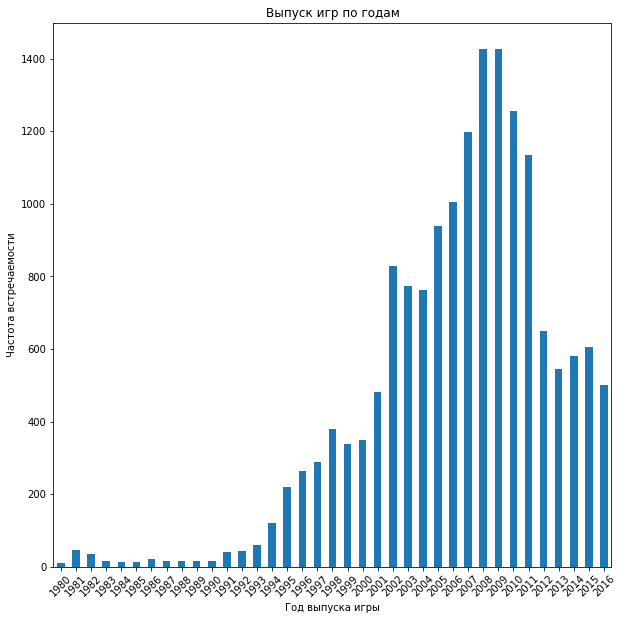

In [38]:
plt.figure(figsize = (10,10))
games.groupby('year_of_release')['name'].count().plot.bar(rot = 45)
plt.ylabel('Частота встречаемости')
plt.xlabel('Год выпуска игры')
plt.title('Выпуск игр по годам')
plt.show()

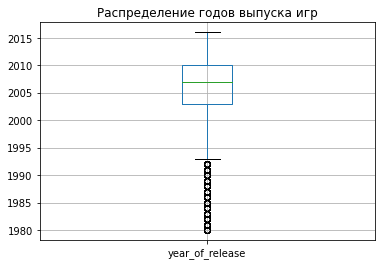

In [39]:
games.boxplot('year_of_release')
plt.title('Распределение годов выпуска игр')
plt.show()

Ну и статистика:

In [40]:
games['year_of_release'].describe()

count    16441.000000
mean      2006.485250
std          5.875589
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

#### Вывод
Видно, что до 1995 игр практически не выпускалось, затем произошел резкий рост с небольшим плато на 1999-2000 годах, снова резкий рост с максимумом в 2008-2009 годах, затем пару лет чуть пониже показатели, и затем падение к половине показателей в 2011-2016 годах. Все периоды абсолютно не важны, можно использовать периоды с 2003 по 2010 год (1й и 3й квартили).

Если смотреть на то, что необходимо учитывать именно актуальный период, чтобы спрогнозировать 2017й год, возьму период с 2012 по 2016 годы (на барплоте видно, что характерная частота выпуска игр в эти годы примерно схожая)

### Продажи по платформам за весь период

Рассмотрю общие продажи игр по платформам

In [41]:
max_platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
max_platform_sales.head(10) # выведем на  экран десять платформ с максимальными показателями по продажам

platform
PS2     1233.56
X360     959.68
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Видно, что самые популярные платформы - PS2, X360, PS3, Wii и DS  (топ-5)

Теперь построю распределение для топ-10 платформ по годам

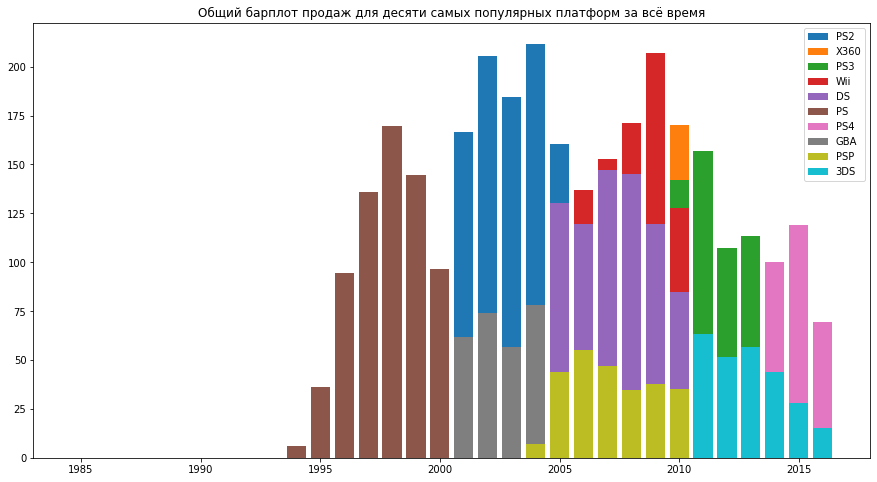

In [42]:
for i in range(len(max_platform_sales.head(10).index)):
    platforms = max_platform_sales.head(10).index[i]
    x = games.query('platform == @platforms').groupby('year_of_release')['total_sales'].sum()
    height = x.values
    bars = x.index
    plt.bar(bars, height, label = platforms)
    
plt.legend(loc = 'best')    
plt.gcf().set_size_inches(15, 8)
plt.title('Общий барплот продаж для десяти самых популярных платформ за всё время')
plt.show()

Видно, что в целом срок появления-исчезновения новых платформ составляет 5-10 лет, но получилось не очень информативно, попробую разбить на отдельные графики и красиво вывести на экран

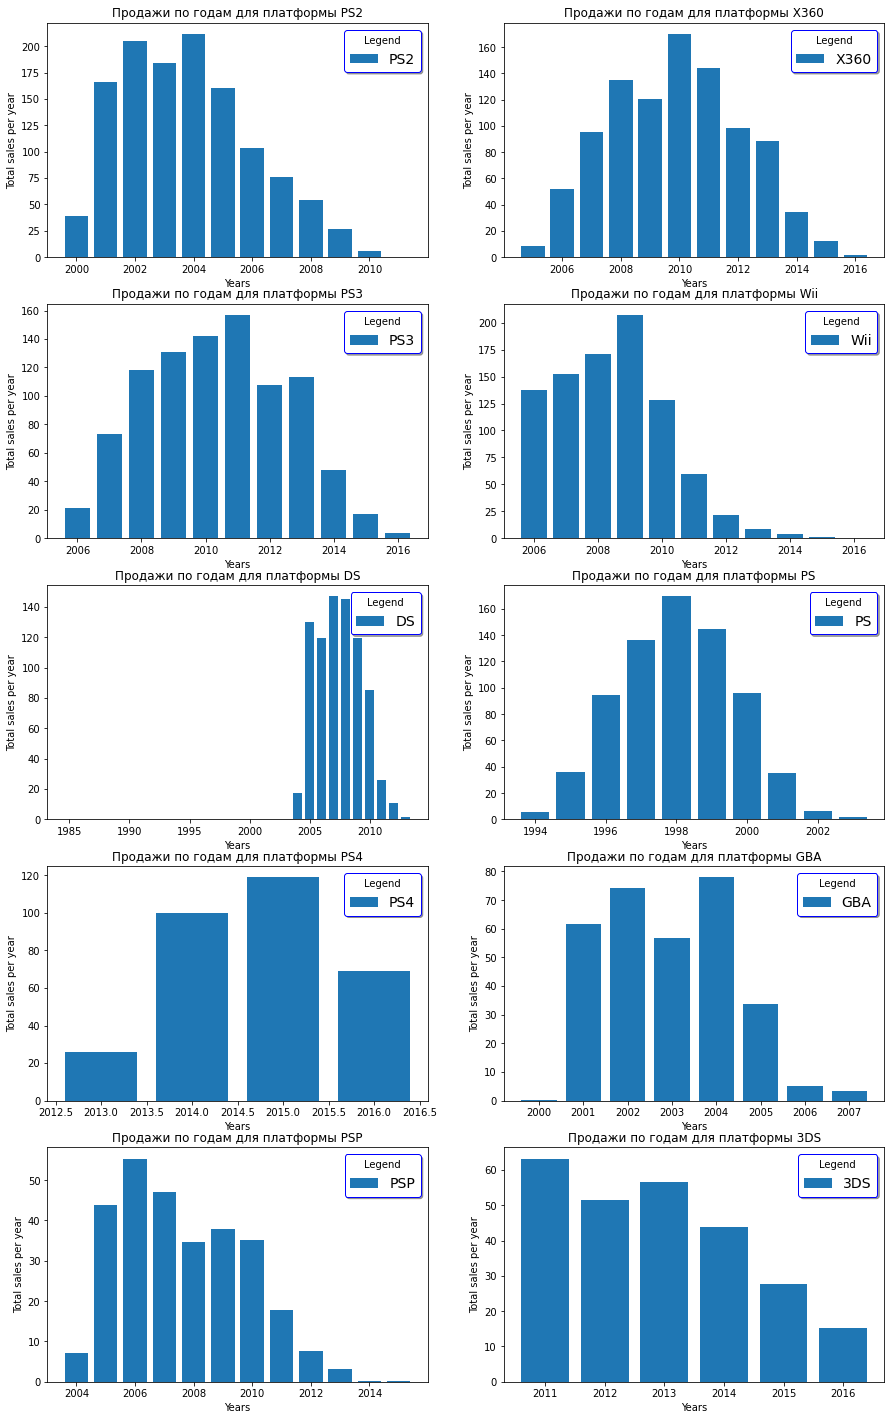

In [43]:
i = 0
j = 0
i_max = len(max_platform_sales.head(10).index)//2
j_max = len(max_platform_sales.head(10).index)//i_max


for _ in range(len(max_platform_sales.head(10).index)):
    if (i*j_max+j+1) < len(games['platform'].unique()):
        if (j == j_max):
            j = 0
            i += 1
        title = 'Продажи по годам для платформы '
        platforms = max_platform_sales.head(10).index[_]
        title += platforms
        plt.subplot(i_max, j_max, i*j_max+j+1)
        x = games.query('platform == @platforms').groupby('year_of_release')['total_sales'].sum()
        height = x.values
        bars = x.index
        plt.bar(bars, height, label = platforms)
        plt.legend(fontsize=14, shadow=True, framealpha=1, facecolor='w', edgecolor='b', title='Legend', loc = 'best')
        plt.gcf().set_size_inches(15, 25)
        plt.xlabel('Years')
        plt.title(title)
        plt.ylabel('Total sales per year')
        j += 1
    else:
        break

#### Вывод
- самые популярные платформы за весь период - PS2, X360, PS3, Wii и DS (топ-5)
- видно, что в целом, жизнь платформы исчисляется десятью годами. Многие из вышепредставленных выходят на пик продаж к 4му-5му году существования. Есть платформы с продажами, которые похожи на нормальное или скошенное нормальное распределения, есть платформы, для которых сложно выявить какую-либо динамику.
- видно также широкий разброс платформ по годам, одни появлялись-выходили на пик-исчезали, на их место приходили другие, некоторые конкурировали между собой, существуя в одно время.

### Продажи по платформам за актуальный период

Рассмотрю более актуализированные данные, а именно возьму период, выбранный на одном из прошлых этапов: `2012-2016` годы, и посмотрю, будет ли разница, да и в целом надо оценивать его для прогноза 2017го года.

In [44]:
max_platform_sales_2012 = games.query('year_of_release >= 2012').groupby('platform')['total_sales'].sum().sort_values(ascending = False)
max_platform_sales_2012.head(10) 

platform
PS4     314.14
PS3     288.78
X360    234.98
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.57
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64

Видно, что в топе уже совсем другие платформы, рассмотрю же теперь их распределение по годам

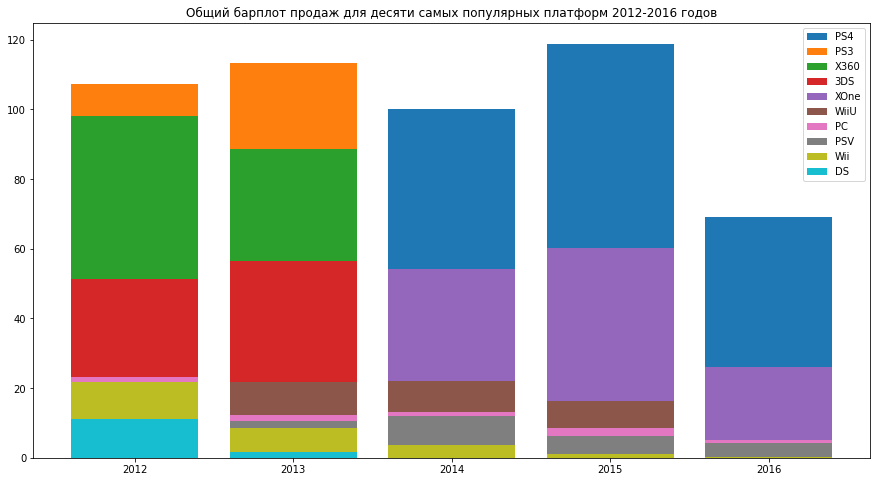

In [45]:
for i in range(len(max_platform_sales_2012.head(10).index)):
    platforms = max_platform_sales_2012.head(10).index[i]
    x = games.query('(platform == @platforms)&(year_of_release >= 2012)').groupby('year_of_release')['total_sales'].sum()
    height = x.values
    bars = x.index
    plt.bar(bars, height, label = platforms)
    
plt.legend(loc = 'best')    
plt.gcf().set_size_inches(15, 8)
plt.title('Общий барплот продаж для десяти самых популярных платформ 2012-2016 годов')
plt.show()

Снова не очень информативно, хотя уже здесь видно, что 2012-2013 годы в топе были PS3 и X360, а в 2014-2016 годах уже PS4 и XOne 

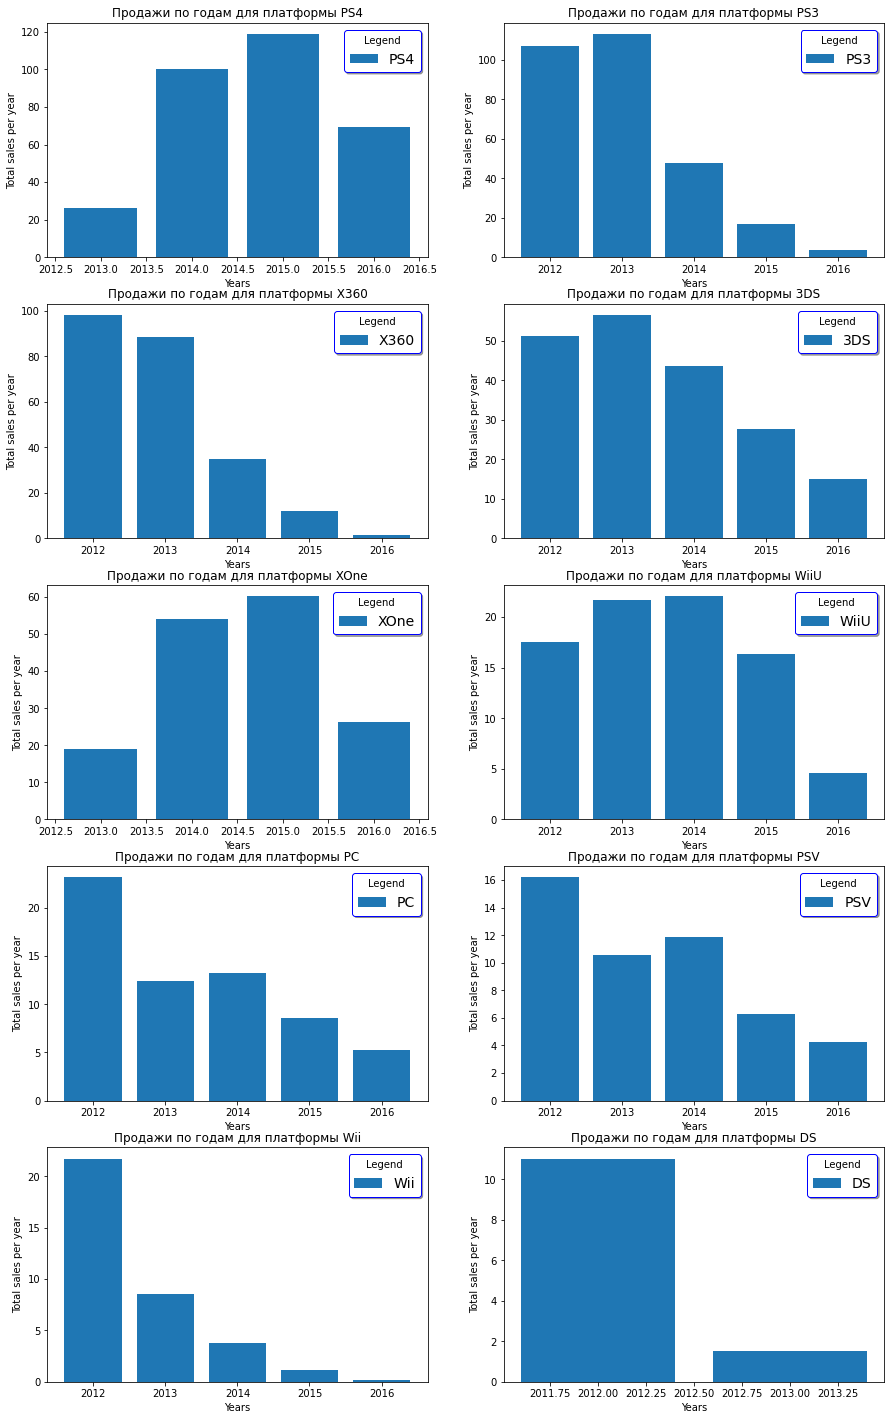

In [46]:
i = 0
j = 0
i_max = len(max_platform_sales_2012.head(10).index)//2
j_max = len(max_platform_sales_2012.head(10).index)//i_max


for _ in range(len(max_platform_sales_2012.head(10).index)):
    if (i*j_max+j+1) < len(games['platform'].unique()):
        if (j == j_max):
            j = 0
            i += 1
        title = 'Продажи по годам для платформы '
        platforms = max_platform_sales_2012.head(10).index[_]
        title += platforms
        plt.subplot(i_max, j_max, i*j_max+j+1)
        x = games.query('(platform == @platforms)&(year_of_release >= 2012)').groupby('year_of_release')['total_sales'].sum()
        height = x.values
        bars = x.index
        plt.bar(bars, height, label = platforms)
        plt.legend(fontsize=14, shadow=True, framealpha=1, facecolor='w', edgecolor='b', title='Legend', loc = 'best')
        plt.gcf().set_size_inches(15, 25)
        plt.xlabel('Years')
        plt.ylabel('Total sales per year')
        plt.title(title)
        j += 1
    else:
        break

Видно, что за актуальный период практически в ноль упали продажи PS3, X360, Wii и DS, также раза в четыре упали продажи 3DS, , WiiU, PC, PSV, раза в 2 у XOne и полтора у PS4, из потенциально прибыльных платформ можно выделить PS4 и XOne

Попробую рассмотреть ящики с усами по глобальным продажам в разбивке поп платформам и посмотрим, что да как (ЗА АКТУАЛЬНЫЙ ПЕРИОД)

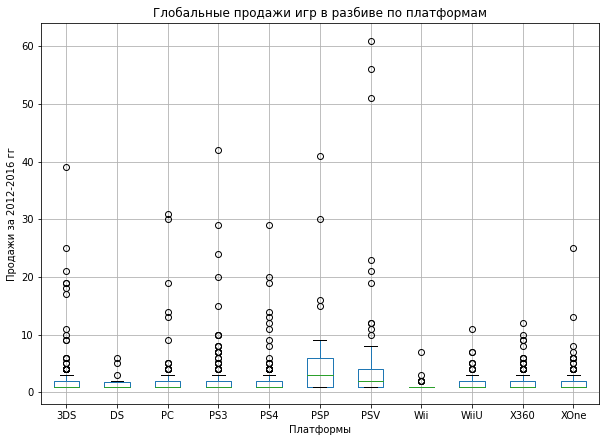

In [47]:
games_2012_pivot = games.query('year_of_release >= 2012').\
pivot_table(index = 'total_sales',\
            columns = 'platform', \
            values = 'name', \
            aggfunc = 'count')

games_2012_pivot.boxplot()
plt.gcf().set_size_inches(10, 7)
plt.title('Глобальные продажи игр в разбиве по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи за 2012-2016 гг')
plt.show()

Видно, что много выбросов, которые мешают обзору данных, попробую ограничить десятью миллионами продаж:

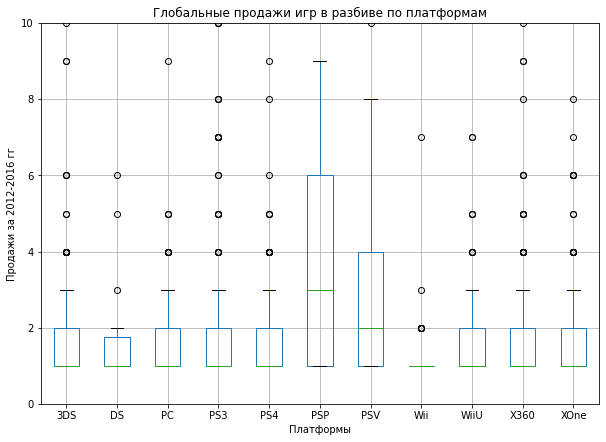

In [48]:
games_2012_pivot.boxplot()
plt.gcf().set_size_inches(10, 7)
plt.title('Глобальные продажи игр в разбиве по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи за 2012-2016 гг')
plt.ylim(0,10)
plt.show()

На боксплотах видно, что самые большие продажи у платформ PSP и PSV за период с 2012 по 2016 гг. На остальных платформах продажи хуже. Видно много выбросов в данных, что говорит о большом разбросе доходов от платформ. 

#### Вывод
- Самые популярные платформы за этот период - PS4, PS3, X360, 3DS и XOne (топ-5)
- На общем барплоте продаж по платформам за 2012-2016 годы получается не очень информативно, хотя видно, что 2012-2013 годы в топе были PS3 и X360, а в 2014-2016 годах уже PS4 и XOne
- На отдельных барплотах (для каждой платформы из топа) видно, что за актуальный период практически в ноль упали продажи PS3, X360, Wii и DS, также раза в четыре упали продажи 3DS, , WiiU, PC, PSV, раза в 2 у XOne и полтора у PS4, из потенциально прибыльных платформ можно выделить PS4 и XOne
- На боксплотах видно, что самые большие продажи у нас у платформ PSP и PSV за период с 2012 по 2016 гг. На остальных платформах продажи хуже. Видно много выбросов в данных, что говорит о большом разбросе доходов от платформ. 

### Влияние отзывов пользователей и критиков на продажи

Рассмотрю самую популярую платформу за период 2012-2016 годов - PS4

Построю скаттерплот для зависимости продаж от оценок критиков для PS4 в период с 2012 по 2016 годы

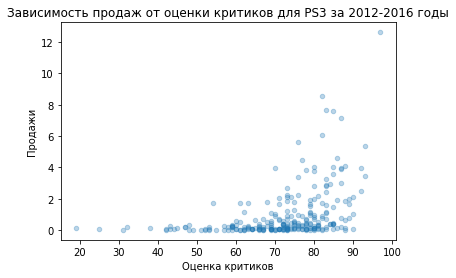

In [49]:
games.query('(platform == "PS4")&(year_of_release >= 2012)').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки критиков для PS3 за 2012-2016 годы')
plt.show()

Видно, что есть определенные выбросы, мешающие понять, есть ли какая зависимость или нет. Отсеку продажи, которые больше 3 млн

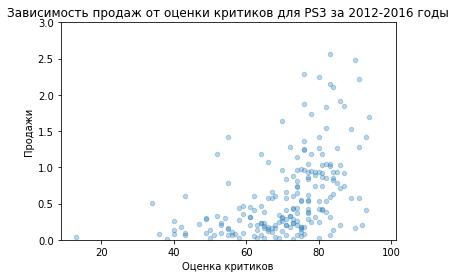

In [50]:
games.query('(platform == "PS3")&(year_of_release >= 2012)').plot(x='critic_score', y='total_sales',ylim = (0, 3), kind='scatter', alpha=0.3)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки критиков для PS3 за 2012-2016 годы')
plt.show()

Теперь видно, что зависимость есть, чем меньше оценка критиков, тем меньше продажи и тем уже разброс по ним, в то время как высокая оценка критиков - более высокие продажи и бОльший разброс по ним

Теперь рассмотрю продажи по пользовательской оценке

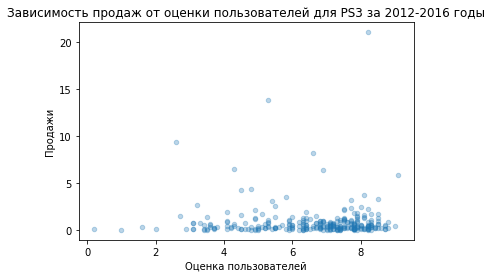

In [51]:
games.query('(platform == "PS3")&(year_of_release >= 2012)').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки пользователей для PS3 за 2012-2016 годы')
plt.show()

Тут также есть выбросы, поэтому отсеку продажи больше 3 млн, чтобы рассмотреть получше

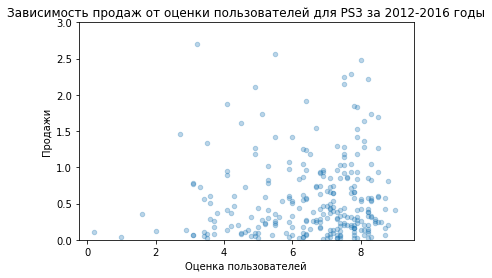

In [52]:
games.query('(platform == "PS3")&(year_of_release >= 2012)').plot(x='user_score', y='total_sales',ylim = (0, 3), kind='scatter', alpha=0.3)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Зависимость продаж от оценки пользователей для PS3 за 2012-2016 годы')
plt.show()

Видно, что уже не так очевидно, как с критиками: как средние, так и хорошие оценки могут иметь место при высоких продажах, что довольно просто объяснить: критики - люди, "специально обученные" оценивать, с большой натяжкой можно сказать, что мнение критиков объективно, и, в принципе, может управлять восприятием игры другими, а, следовательно, и на продажи, в то время как оценка пользователя сугубо субъективна и не влияет на мир в целом.

Посчитаю же коэффициенты корреляции:

In [53]:
games.query('(platform == "PS3")&(year_of_release >= 2012)')['total_sales'].\
corr(games.query('(platform == "PS3")&(year_of_release >= 2012)')['critic_score'])

0.3341517575509856

In [54]:
games.query('(platform == "PS3")&(year_of_release >= 2012)')['total_sales'].\
corr(games.query('(platform == "PS3")&(year_of_release >= 2012)')['user_score'])

-0.006205767686051522

Как видно по коэффициентам корреляции, между продажами и оценкой критиков есть слабая положительная корреляция, в то время как между продажами и оценкой пользователей корреляция практически нулевая (её нет)

#### Вывод

- Зависимость между продажами и оценкой критиков есть, чем меньше оценка критиков, тем меьше продажи и тем уже разброс по ним, в то время как высокая оценка критиков - более высокие продажи и бОльший разброс по ним. 

- С зависимостью продаж от оценки пользователей, что уже не так очевидно, как с критиками: как средние, так и хорошие оценки могут иметь место при высоких продажах, что довольно просто объяснить: критики - люди, "специально обученные" оценивать, с большой натяжкой можно сказать, что мнение критиков объективно, и, в принципе, может управлять восприятием игры другими, а, следовательно, и на продажи, в то время как оценка пользователя сугубо субъективна и не влияет на мир в целом.

- Если взглянуть на коэффициенты корреляции: по коэффициентам корреляции, между продажами и оценкой критиков есть слабая положительная корреляция (0.334), в то время как между продажами и оценкой пользователей корреляция практически нулевая (-0.006).

> Если соотносить вывод с продажами игр на других платформах, следует ожидать, что продажи будут низкие у игр с низкой оценкой критиков и наоборот

#### Небольшая проверка вывода
Посмотрю на коэффициенты корреляции зависимости продаж от оценки критиков для топ-5 самых продаваемых платформ 2012-2016 годов(список взят из одного из предыдущих пунктов):

In [55]:
critic_corr = {}
for _ in range(len(max_platform_sales_2012.head().index)):
    platforms = max_platform_sales_2012.head().index[_]
    correl = games.query('(platform == @platforms)&(year_of_release >= 2012)')['total_sales'].\
    corr(games.query('(platform == @platforms)&(year_of_release >= 2012)')['critic_score'])
    critic_corr[platforms] = correl

for key, value in critic_corr.items():
    print(f'{key:<5}: {value}')

PS4  : 0.406567902061781
PS3  : 0.3341517575509856
X360 : 0.36017189710221803
3DS  : 0.32080286953607845
XOne : 0.41699832800840175


Как видно, для всех подтверждается наличие положительной, хоть и слабой корреляции между продажами и оценкой критиков

Проверю, как обстоят дела с корреляцией продаж и пользовательской оценки

In [56]:
user_corr = {}
for _ in range(len(max_platform_sales_2012.head().index)):
    platforms = max_platform_sales_2012.head().index[_]
    correl = games.query('(platform == @platforms)&(year_of_release >= 2012)')['total_sales'].\
    corr(games.query('(platform == @platforms)&(year_of_release >= 2012)')['user_score'])
    user_corr[platforms] = correl

for key, value in user_corr.items():
    print(f'{key:<5}: {value}')

PS4  : -0.031957110204556376
PS3  : -0.006205767686051522
X360 : 0.0039205673489798466
3DS  : 0.19758263411038596
XOne : -0.06892505328279412


Для пользователей ситуация не такая однозначная, для большинства (4 из 5) характерно отсутствие корреляции, в то время как для одного выясняется слабая положительная корреляция.
Можно считать, что исключения подтверждают правило и в целом просто для некоторых платформ прослеживается такая зависимость, а для некоторых никакой зависимости не прослеживается

### Распределение игр по жанрам
Рассмотрю, как игры распределены по жанрам и как они соотносятся с прибылью (за актуальный период)

In [57]:
games.query('year_of_release >= 2012')['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           113
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

Видно, что самые популярные жанры: `Action`, `Role-Playing`, `Adventure`, `Sports` и `Shooter`.

Рассмотрю, как жанры связаны с прибылью

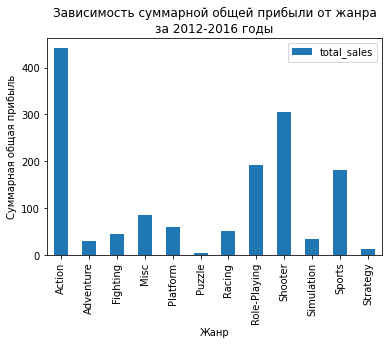

In [58]:
games.query('year_of_release >= 2012').pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').plot.bar()
plt.xlabel('Жанр')
plt.ylabel('Суммарная общая прибыль')
plt.title('Зависимость суммарной общей прибыли от жанра\nза 2012-2016 годы')
plt.show()

Видно, что самый прибыльный по суммарной общей прибыли - `Action`, следом идут `Shooter`, `Sports` и `Role-Playing`. Но это необъективная оценка, так как игр с разными жанрами разное количество, поэтому посмотрю на средние арифметические и медианы прибылей по жанрам

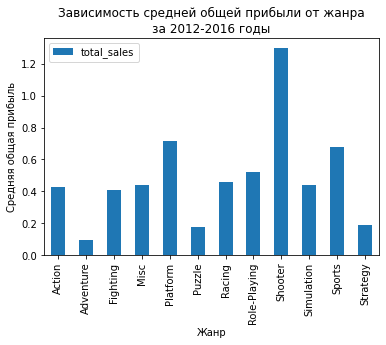

In [59]:
games.query('year_of_release >= 2012').pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').plot.bar()
plt.xlabel('Жанр')
plt.ylabel('Средняя общая прибыль')
plt.title('Зависимость средней общей прибыли от жанра\nза 2012-2016 годы')
plt.show()

Если взять среднюю общую прибыль по жанрам, то на первом месте уже `Shooter`, затем идут `Platforms` и `Sports`, `Action`, бывший лидером по суммарной общей прибыли, составляет где-то треть от максимума средней

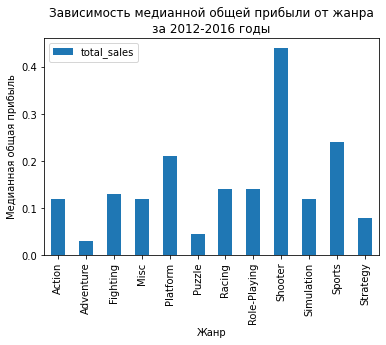

In [60]:
games.query('year_of_release >= 2012').pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').plot.bar()
plt.xlabel('Жанр')
plt.ylabel('Медианная общая прибыль')
plt.title('Зависимость медианной общей прибыли от жанра\nза 2012-2016 годы')
plt.show()

В медианной общей прибыли лидирубщие позиции все так же занимает `Shooter`, однако `Sports` уже на втором месте

#### Вывод

Я рассмотрел распределение игр по жанрам, а также уровень продаж, в зависимости от жанра и получили следующие выводы:
- самые популярные жанры: `Action`, `Role-Playing`, `Adventure`, `Sports` и `Shooter`.
- самый прибыльный жанр по суммарной общей прибыли - `Action`, следом идут `Sports`, `Role-Playing` и `Shooter`. Но это необъективная оценка, так как игр с разными жанрами разное количество, поэтому мы решили посмотреть на средние арифметические и медианы прибылей по жанрам
- eсли взять среднюю общую прибыль по жанрам, то на первом месте уже `Shooter`, затем идут `Platforms` и `Sports`, `Action`, бывший лидером по суммарной общей прибыли, составляет где-то треть от максимума средней
- в медианной общей прибыли лидирубщие позиции все так же занимает `Shooter`, однако `Sports` уже на втором месте

> корректнее всего использовать медиану общей прибыли, чтобы исключить влияние выбросов на значение рассчитываемого параметра центральной тенденции

### **Промежуточный итог 3**
Проведен исследовательский анализ данных и получены следующие выводы:
- **Сколько игр выпускалось в разные годы?**
    
    Видно, что до 1995 игр практически не выпускалось, затем произошел резкий рост с небольшим плато на 1999-2000 годах, снова резкий рост с максимумом в 2008-2009 годах, затем пару лет чуть пониже показатели, и затем падение к половине показателей в 2011-2016 годах. Все периоды абсолютно не важны, можно использовать периоды с 2003 по 2010 год (1й и 3й квартили).
    
    Если смотреть на то, что необходимо учитывать именно актуальный период, чтобы спрогнозировать 2017й год, возьму период с 2012 по 2016 годы (на барплоте видно, что характерная частота выпуска игр в эти годы примерно схожая)
    
    
- **Продажи по платформам за весь период**
    - самые популярные платформы за весь период - PS2, X360, PS3, Wii и DS
    - видно, что в целом, жизнь платформы исчисляется десятью годами. Многие из вышепредставленных выходят на пик продаж к 4му-5му году существования. Есть платформы с продажами, которые похожи на нормальное или скошенное нормальное распределения, есть платформы, для которых сложно выявить какую-либо динамику.
    - видно также широкий разброс платформ по годам, одни появлялись-выходили на пик-исчезали, на их место приходили другие, некоторые конкурировали межуд собой, существуя в одно время.
    
    
- **Продажи по платформам за актуальный период**
    - Самые популярные платформы за этот период - PS4, PS3, X360, 3DS и XOne (топ-5)
    - На общем барплоте продаж по платформам за 2012-2016 годы получается не очень информативно, хотя видно, что 2012-2013 годы в топе были PS3 и X360, а в 2014-2016 годах уже PS4 и XOne
    - На отдельных барплотах (для каждой платформы из топа) видим, что за актуальный период практически в ноль упали продажи PS3, X360, Wii и DS, также раза в четыре упали продажи 3DS, , WiiU, PC, PSV, раза в 2 у XOne и полтора у PS4, из потенциально прибыльных платформ можно выделить PS4 и XOne
    - На боксплотах видно, что самые большие продажи у платформ PSP и PSV за период с 2012 по 2016 гг. На остальных платформах продажи хуже. Видим много выбросов в данных, что говорит о большом разбросе доходов от платформ. 
    
    
- **Влияние отзывов на продажи**
    - Зависимость между продажами и оценкой критиков есть, чем меньше оценка критиков, тем меьше продажи и тем уже разброс по ним, в то время как высокая оценка критиков - более высокие продажи и бОльший разброс по ним. 

    - С зависимостью продаж от оценки пользователей, что уже не так очевидно, как с критиками: как средние, так и хорошие оценки могут иметь место при высоких продажах, что довольно просто объяснить: критики - люди, "специально обученные" оценивать, с большой натяжкой можно сказать, что мнение критиков объективно, и, в принципе, может управлять восприятием игры другими, а, следовательно, и на продажи, в то время как оценка пользователя сугубо субъективна и не влияет на мир в целом.

    - Если взглянуть на коэффициенты корреляции: по коэффициентам корреляции, между продажами и оценкой критиков есть слабая положительная корреляция (0.334), в то время как между продажами и оценкой пользователей корреляция практически нулевая (-0.006).

> Если соотносить вывод с продажами игр на других платформах, следует ожидать, что продажи будут низкие у игр с низкой оценкой критиков и наоборот

- **Распределение игр по жанрам**
- самые популярные жанры: `Action`, `Role-Playing`, `Adventure`, `Sports` и `Shooter`.
- самый прибыльный жанр по суммарной общей прибыли - `Action`, следом идут `Shooter`, `Sports` и `Role-Playing`. Но это необъективная оценка, так как игр с разными жанрами разное количество, поэтому мы решили посмотреть на средние арифметические и медианы прибылей по жанрам
- eсли взять среднюю общую прибыль по жанрам, то на первом месте уже `Shooter`, затем идут `Platforms` и `Sports`, `Action`, бывший лидером по суммарной общей прибыли, составляет где-то треть от максимума средней
- в медианной общей прибыли лидирубщие позиции все так же занимает `Shooter`, однако `Sports` уже на втором месте

> корректнее всего использовать медиану общей прибыли, чтобы исключить влияние выбросов на значение рассчитываемого параметра центральной тенденции

## Портрет пользователей регионов
Необходимо определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы 

Рассмотрю самые популярные платформы для пользователя каждого региона. Сгруппировав данные продаж по платформам, посчитаю продажи в каждом регионе, далее отсортирую по убыванию и выведу первые пять строк (все это за актуальный период)

Посмотрю на топ-5 в северной америке

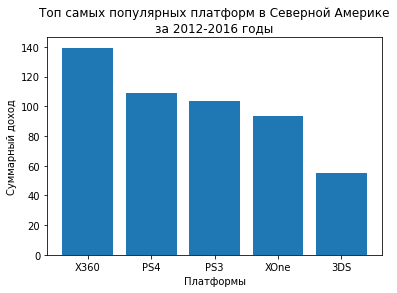

In [61]:
na_platforms = games.query('year_of_release >= 2012').groupby('platform')['na_sales'].\
sum().sort_values(ascending = False).head()
plt.bar(na_platforms.index, na_platforms.values)
plt.xlabel('Платформы')
plt.ylabel('Суммарный доход')
plt.title('Топ самых популярных платформ в Северной Америке\nза 2012-2016 годы')
plt.show()

В северной америке в 2012-2016 годах топ-5 платформ представлен `X360`, `PS4`, `PS3`, `XOne` и `3DS`.

Теперь посмотрю на европу:

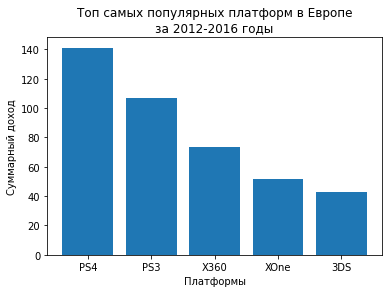

In [62]:
eu_platforms = games.query('year_of_release >= 2012').groupby('platform')['eu_sales'].\
sum().sort_values(ascending = False).head()
plt.bar(eu_platforms.index, eu_platforms.values)
plt.xlabel('Платформы')
plt.ylabel('Суммарный доход')
plt.title('Топ самых популярных платформ в Европе\nза 2012-2016 годы')
plt.show()

В европе в 2012-2016 годах топ-5 платформ представлен `PS4`, `PS3`, `X360`, `XOne` и `3DS`.
А что же в Японии?

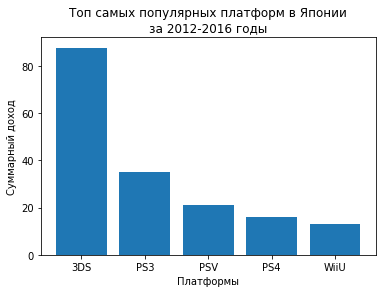

In [63]:
jp_platforms = games.query('year_of_release >= 2012').groupby('platform')['jp_sales'].\
sum().sort_values(ascending = False).head()
plt.bar(jp_platforms.index, jp_platforms.values)
plt.xlabel('Платформы')
plt.ylabel('Суммарный доход')
plt.title('Топ самых популярных платформ в Японии\nза 2012-2016 годы')
plt.show()

В японии в 2012-2016 годах топ-5 платформ представлен `3DS`, `PS3`, `PSV`, `PS4` и `WiiU`.

Но это были суммарные продажи платформ, взглянем на доли продаж от всех платформ.

Начну с северной Америки

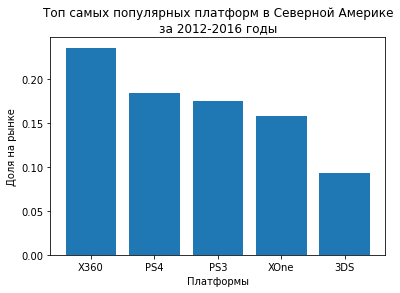

In [64]:
na_platforms_fraction = games.query('year_of_release >= 2012').groupby('platform')['na_sales'].\
sum().sort_values(ascending = False).head()/games.query('year_of_release >= 2012').\
groupby('platform')['na_sales'].sum().sum()
plt.bar(na_platforms_fraction.index, na_platforms_fraction.values)
plt.xlabel('Платформы')
plt.ylabel('Доля на рынке')
plt.title('Топ самых популярных платформ в Северной Америке\nза 2012-2016 годы')
plt.show()

Видно, что `X360` занимает практически 24% рынка, следом идет `PS4` c 18.4% и затем `PS3` c 17.5%

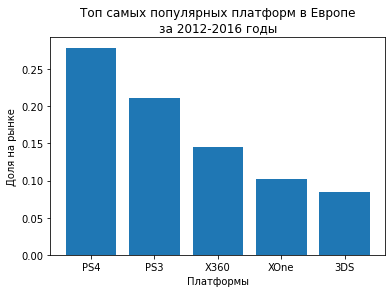

In [65]:
eu_platforms_fraction = games.query('year_of_release >= 2012').groupby('platform')['eu_sales'].\
sum().sort_values(ascending = False).head()/games.query('year_of_release >= 2012').\
groupby('platform')['eu_sales'].sum().sum()
plt.bar(eu_platforms_fraction.index, eu_platforms_fraction.values)
plt.xlabel('Платформы')
plt.ylabel('Доля на рынке')
plt.title('Топ самых популярных платформ в Европе\nза 2012-2016 годы')
plt.show()

В Европе `PS4` занимает практически 28% рынка, далее `PS3` примерно 21% и `X360` с 14.6%.

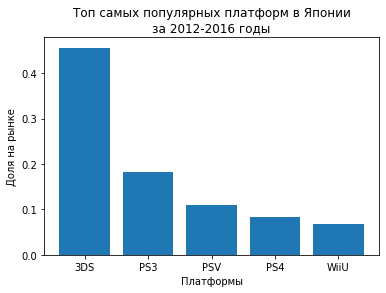

In [66]:
jp_platforms_fraction = games.query('year_of_release >= 2012').groupby('platform')['jp_sales'].\
sum().sort_values(ascending = False).head()/games.query('year_of_release >= 2012').\
groupby('platform')['jp_sales'].sum().sum()
plt.bar(jp_platforms_fraction.index, jp_platforms_fraction.values)
plt.xlabel('Платформы')
plt.ylabel('Доля на рынке')
plt.title('Топ самых популярных платформ в Японии\nза 2012-2016 годы')
plt.show()

В Японии же на первом месте `3DS` c аж 45.6%, следом идет `PS3` с 18% и `PSV` с всего 11%.

#### Вывод
- В северной америке в 2012-2016 годах топ-5 платформ представлен `X360`, `PS4`, `PS3`, `XOne` и `3DS`. Видим, что `X360` занимает практически 24% рынка, следом идет `PS4` c 18.4% и затем `PS3` c 17.5%.
- В европе в 2012-2016 годах топ-5 платформ представлен `PS4`, `PS3`, `X360`, `XOne` и `3DS`. `PS4` занимает практически 28% рынка, далее `PS3` примерно 21% и `X360` с 14.6%.
- В японии в 2012-2016 годах топ-5 платформ представлен `3DS`, `PS3`, `PSV`, `PS4` и `WiiU`. `3DS` занимает нишу в аж 45.6%, следом идет `PS3` с 18% и `PSV` с всего 11%.

Что я вижу?
1. В Европе и Северной Америке одинаковый перечень платформ в топ-5, но места у них разные. В америке самая популярная платформа `X360`, в европе - `PS4`.
2. В Японии в топе присутствуют отличные от американского и европейского топов платформы.
3. Распределение долей рынка в америке и европе довольно схоже, нет каких-то прям мега-явных перекосов, в то время как в японии практически половину рынка заняла платформа `3DS`.

### Самые популярные жанры

Рассмотрю самые популярные жанры для пользователя каждого региона. Сгруппировав данные продаж по жанрам, посчитаю продажи в каждом регионе, далее отсортирую по убыванию и выведем первые пять строк (все это за актуальный период). Буду считать сразу долю от всех, чтобы формировать выводы

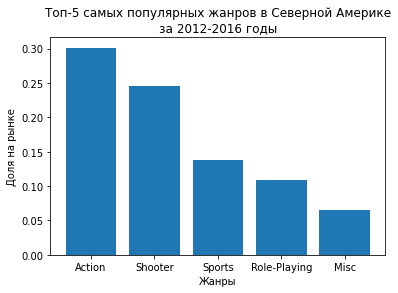

In [67]:
na_genre = games.query('year_of_release >= 2012').groupby('genre')['na_sales'].\
sum().sort_values(ascending = False).head()/games.query('year_of_release >= 2012').\
groupby('genre')['na_sales'].sum().sum()
plt.bar(na_genre.index, na_genre.values)
plt.xlabel('Жанры')
plt.ylabel('Доля на рынке')
plt.title('Топ-5 самых популярных жанров в Северной Америке\nза 2012-2016 годы')
plt.show()

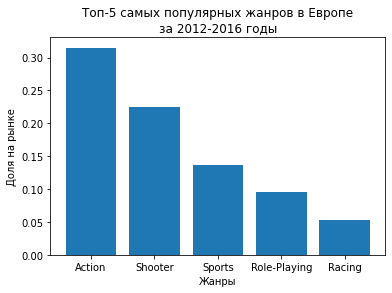

In [68]:
eu_genre = games.query('year_of_release >= 2012').groupby('genre')['eu_sales'].\
sum().sort_values(ascending = False).head()/games.query('year_of_release >= 2012').\
groupby('genre')['eu_sales'].sum().sum()
plt.bar(eu_genre.index, eu_genre.values)
plt.xlabel('Жанры')
plt.ylabel('Доля на рынке')
plt.title('Топ-5 самых популярных жанров в Европе\nза 2012-2016 годы')
plt.show()

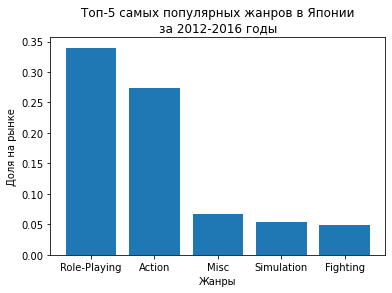

In [69]:
jp_genre = games.query('year_of_release >= 2012').groupby('genre')['jp_sales'].\
sum().sort_values(ascending = False).head()/games.query('year_of_release >= 2012').\
groupby('genre')['jp_sales'].sum().sum()
plt.bar(jp_genre.index, jp_genre.values)
plt.xlabel('Жанры')
plt.ylabel('Доля на рынке')
plt.title('Топ-5 самых популярных жанров в Японии\nза 2012-2016 годы')
plt.show()

#### Вывод
Были рассмотрены жанровые предпочтения пользователей разных регионов в период с 2012 по 2016 годы:
- в северной америке самые популярные жанры: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Misc`
- в европе: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Racing`
- в японии: `Role-Playing`, `Action`, `Misc`, `Simulation`,  и `Fighting`

Как видно, в северной америке и европе практически идентичные жанровые предпочтения с очень схожими долями рынка, в то время как в японии слвсем другие жанры преобладают - у них не популярны шутеры, но зато файтинги и ролевые игры в топе, что, отчасти, может быть продиктовано элементами их культуры.

### Рейтинг ESRB
Рассмотрю, влияет ли рейтинг ESRB на продажи в отдельном регионе

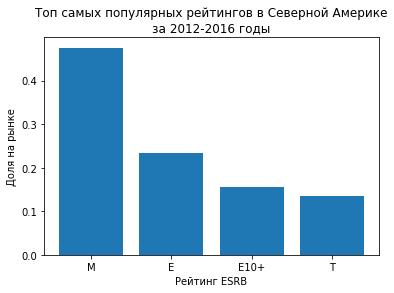

In [70]:
na_rating = games.query('year_of_release >= 2012').groupby('rating')['na_sales'].\
sum().sort_values(ascending = False)/games.query('year_of_release >= 2012').\
groupby('rating')['na_sales'].sum().sum()
plt.bar(na_rating.index, na_rating.values)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Доля на рынке')
plt.title('Топ самых популярных рейтингов в Северной Америке\nза 2012-2016 годы')
plt.show()

Видно, что в северной америке самый популярный жанр: M (с практически половиной доходов), далее идут E, E10+ и T соответственно

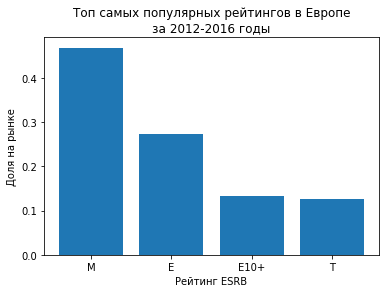

In [71]:
eu_rating = games.query('year_of_release >= 2012').groupby('rating')['eu_sales'].\
sum().sort_values(ascending = False)/games.query('year_of_release >= 2012').\
groupby('rating')['eu_sales'].sum().sum()
plt.bar(eu_rating.index, eu_rating.values)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Доля на рынке')
plt.title('Топ самых популярных рейтингов в Европе\nза 2012-2016 годы')
plt.show()

Видно, что в европе самый популярный жанр: тоже M (и тоже с практически половиной доходов), далее идут E, E10+ и T соответственно

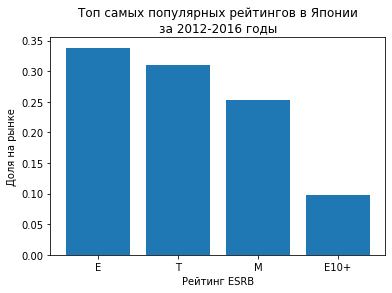

In [72]:
jp_rating = games.query('year_of_release >= 2012').groupby('rating')['jp_sales'].\
sum().sort_values(ascending = False)/games.query('year_of_release >= 2012').\
groupby('rating')['jp_sales'].sum().sum()
plt.bar(jp_rating.index, jp_rating.values)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Доля на рынке')
plt.title('Топ самых популярных рейтингов в Японии\nза 2012-2016 годы')
plt.show()

Видно, что в японии самый популярный жанр: E (с третью доходов), далее идут Е, M и E10+ соответственно

#### Вывод
Были срассмотрены рейтинговые предпочтения в каждом регионе за 2012-2016 годы:
- в северной америке самый популярный рейтинг: M (с практически половиной доходов), далее идут E, E10+ и T соответственно
- в европе самый популярный рейтинг: тоже M (и тоже с практически половиной доходов), далее идут E, E10+ и T соответственно
- в японии самый популярный рейтинг: E (с третью доходов), далее идут T, M и E10+ соответственно

Исходя из вышеперечисленного, можно сказать, что рейтинг ESRB влияет на продажи в отдельном регионе, в северной америке и европе популярны игры с одним рейтингом, в японии же - совсем другие.

### **Промежуточный итог 4**
Я составил портреты пользователей каждого региона за 2012-2016 годы:
- **Самые популярные платформы (топ-5)**
    
    - В северной америке в 2012-2016 годах топ-5 платформ представлен `X360`, `PS4`, `PS3`, `XOne` и `3DS`. Видим, что `X360` занимает практически 24% рынка, следом идет `PS4` c 18.4% и затем `PS3` c 17.5%.
    - В европе в 2012-2016 годах топ-5 платформ представлен `PS4`, `PS3`, `X360`, `XOne` и `3DS`. `PS4` занимает практически 28% рынка, далее `PS3` примерно 21% и `X360` с 14.6%.
    - В японии в 2012-2016 годах топ-5 платформ представлен `3DS`, `PS3`, `PSV`, `PS4` и `WiiU`. `3DS` занимает нишу в аж 45.6%, следом идет `PS3` с 18% и `PSV` с всего 11%.

Что видно?
1. В Европе и Северной Америке одинаковый перечень платформ в топ-5, но места у них разные. В америке самая популярная платформа `X360`, в европе - `PS4`.
2. В Японии в топе присутствуют отличные от американского и европейского топов платформы.
3. Распределение долей рынка в америке и европе довольно схоже, нет каких-то прям мега-явных перекосов, в то время как в японии практически половину рынка заняла платформа `3DS`.
    
    
- **Самые популярные жанры (топ-5)**

Были рассмотрены жанровые предпочтения пользователей разных регионов в период с 2012 по 2016 годы:
- в северной америке самые популярные жанры: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Misc`
- в европе: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Racing`
- в японии: `Role-Playing`, `Action`, `Misc`, `Simulation`,  и `Fighting`

Как видно, в северной америке и европе практически идентичные жанровые предпочтения с очень схожими долями рынка, в то время как в японии слвсем другие жанры преобладают - у них не популярны шутеры, но зато файтинги и ролевые игры в топе, что, отчасти, может быть продиктовано элементами их культуры.
    
    
- **Влияет ли рейтинг ESRB на продажи**

Я рассмотрел рейтинговые предпочтения в каждом регионе за 2012-2016 годы:
- в северной америке самый популярный рейтинг: M (с практически половиной доходов), далее идут E, E10+ и T соответственно
- в европе самый популярный рейтинг: тоже M (и тоже с практически половиной доходов), далее идут E, E10+ и T соответственно
- в японии самый популярный рейтинг: E (с третью доходов), далее идут T, M и E10+ соответственно
    
Исходя из вышеперечисленного, можно сказать, что рейтинг ESRB влияет на продажи в отдельном регионе, в северной америке и европе популярны игры с одним рейтингом, в японии же - совсем другие.

**ОБЩАЯ КАРТИНА СОБЫТИЙ** 

Исходя из полученных во время анализов регионов данных можно сказать, что предпочтения в северной америке и европе довольно близки как по платформе, так и по жанру и рейтингу, в то время как в японии все эти три аспекта отличаются от них, поэтому, если делать упор на глобальность или какой-либо регион, очень важно будет подстраиваться под предпочтения людей оттуда.

## Проверка гипотез

(все гипотезы я буду проверять **для данных за актуальный период**)

### Платформы `XOne` И `PC`
Нулевую и альтернативную гипотезы можно сформулироваться следующим образом:
- $H_0$: средние пользовательские рейтинги платформ XBox One и PC за период 2012-2016 годов одинаковые 
- $H_1$: средние пользовательские рейтинги платформ XBox One и PC за период 2012-2016 годов разные

Проверку буду осуществлять методом проверки равенства средних двух выборок, но, прежде чем проводить статистическую работу, необходимо сформировать две ОДИНАКОВЫЕ по размеру выборки пользовательских оценок на платформах PC и XOne, предварительно отбросив пропуски

In [73]:
PC_users = games.query('year_of_release >= 2012').loc[games['platform'] == "PC", 'user_score'].dropna().reset_index(drop = True)
XOne_users = games.query('year_of_release >= 2012').loc[games['platform'] == "XOne", 'user_score'].dropna().reset_index(drop = True)

if len(PC_users) == len(XOne_users):
    print('Размеры выборок совпадают')
elif len(PC_users) > len(XOne_users):
    print('Размер выборки с оценками пользователей платформы PC больше')
else:
    print('Размер выборки с оценками пользователей платформы XOne больше')

Размер выборки с оценками пользователей платформы PC больше


Видно, что размеры выборок разные, поэтому надо сделать их одинаковыми. Сгенерирую в список `res` рандомные индексы от 0 до длины минимальной выборки, количество генерируемых индексов положим столько, сколько в минимальной выборке (то есть, её индексы выбирать не придется, только в выборке, которая больше)

In [74]:
#генерируем список случайных индексов и проверяем, есть ли дупликаты
import random
if len(PC_users) > len(XOne_users):
    res_1 = random.sample(range(XOne_users.index[0], len(XOne_users)), len(XOne_users)-1)
    res_2 = random.sample(range(PC_users.index[0], len(PC_users)), len(XOne_users)-1)
    dup_1 = [x for i, x in enumerate(res_1) if i != res_1.index(x)]
    dup_2 = [x for i, x in enumerate(res_2) if i != res_2.index(x)]
    PC_users_final = PC_users.loc[PC_users.index[res_2]]
    XOne_users_final = XOne_users.loc[XOne_users.index[res_1]]
elif len(PC_users) < len(XOne_users):
    res_1 = random.sample(range(XOne_users.index[0], len(XOne_users)), len(PC_users)-1)
    res_2 = random.sample(range(PC_users.index[0], len(PC_users)), len(PC_users)-1)
    dup_1 = [x for i, x in enumerate(res_1) if i != res_1.index(x)]
    dup_2 = [x for i, x in enumerate(res_2) if i != res_2.index(x)]
    PC_users_final = PC_users.loc[PC_users.index[res_2]]
    XOne_users_final = XOne_users.loc[XOne_users.index[res_1]]
    
print('Дупликатов в индексах у нас:',len(dup_1),'и',len(dup_2)) 
print('Проверяем длины итоговых выборок. Первая:', len(PC_users_final),', вторая:', len(XOne_users_final))

Дупликатов в индексах у нас: 0 и 0
Проверяем длины итоговых выборок. Первая: 181 , вторая: 181


Видно, что дупликатов индексов =нет, размеры выборок одинаковые, индексы в них сгенерированы рандомно, чтобы получить эти длины (при этом границы рандомизации брал для каждой выборки от 0 до её длины)

In [75]:
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "меньше"
# в первую выборку положим оценки пользователей PС
# во вторую - пользователей XOne

alpha = 0.01 # уровень статистической значимости положим 0.01

hypotesis_1 = (st.ttest_ind(PC_users_final, XOne_users_final)) # двусторонняя альтернативная гипотеза

if hypotesis_1.pvalue < alpha:
    print(f'p-значение равно:{hypotesis_1.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-значение равно:{hypotesis_1.pvalue}. Нет оснований отвергнуть нулевую гипотезу')

p-значение равно:0.6480836645255862. Нет оснований отвергнуть нулевую гипотезу


#### Вывод
Есть основания предполагать, что средние оценки пользователи PC и XOne одинаковые.

### Жанры `Action` и `Sports`
Проверю гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Нулевую и альтернативную гипотезы можно сформулировать следующим образом:
- $H_0$: средние пользовательские рейтинги жанров Action и Sports за период 2012-2016 годов одинаковые
- $H_1$: средние пользовательские рейтинги жанров Action и Sports за период 2012-2016 годов разные

Грубо говоря, проверяется, одинаковые ли средние рейтинги, если нет, значит подтверждается гипотеза о том, что они разные. Методика проверки будет аналогична предыдущей гипотезе.

Проверку буду осуществлять методом проверки равенства средних двух выборок, но, прежде чем проводить статистическую работу, необходимо сформировать две ОДИНАКОВЫЕ по размеру выборки пользовательских рейтингов жанров `Action` и `Sports`, предварительно отбросив пропуски

In [76]:
Action_users = games.query('year_of_release >= 2012').loc[games['genre'] == "Action", 'user_score'].dropna().reset_index(drop = True)
Sports_users = games.query('year_of_release >= 2012').loc[games['genre'] == "Sports", 'user_score'].dropna().reset_index(drop = True)

if len(Action_users) == len(Sports_users):
    print('Размеры выборок совпадают')
elif len(Action_users) > len(Sports_users):
    print('Размер выборки с пользовательсими рейтингами жанра Action больше')
else:
    print('Размер выборки с пользовательсими рейтингами жанра Sports больше')

Размер выборки с пользовательсими рейтингами жанра Action больше


Видно, что размеры выборок разные, поэтому надо сделать их одинаковыми. Сгенерирую в список `res` рандомные индексы от 0 до длины минимальной выборки, количество генерируемых индексов положу столько, сколько у нас в минимальной выборке (то есть, её индексы выбирать не придется, только в выборке, которая больше)

In [77]:
#генерируем список случайных индексов и проверяем, есть ли дупликаты
import random
if len(Action_users) > len(Sports_users):
    res_1 = random.sample(range(Sports_users.index[0], len(Sports_users)), len(Sports_users)-1)
    res_2 = random.sample(range(Action_users.index[0], len(Action_users)), len(Sports_users)-1)
    dup_1 = [x for i, x in enumerate(res_1) if i != res_1.index(x)]
    dup_2 = [x for i, x in enumerate(res_2) if i != res_2.index(x)]
    Action_users_final = Action_users.loc[Action_users.index[res_2]]
    Sports_users_final = Sports_users.loc[Sports_users.index[res_1]]
elif len(Action_users) < len(XOne_users):
    res_1 = random.sample(range(Sports_users.index[0], len(Sports_users)), len(Action_users)-1)
    res_2 = random.sample(range(Action_users.index[0], len(Action_users)), len(Action_users)-1)
    dup_1 = [x for i, x in enumerate(res_1) if i != res_1.index(x)]
    dup_2 = [x for i, x in enumerate(res_2) if i != res_2.index(x)]
    Action_users_final = Action_users.loc[Action_users.index[res_2]]
    Sports_users_final = Sports_users.loc[Sports_users.index[res_1]]
    
print('Дупликатов в индексах у нас:',len(dup_1),'и',len(dup_2)) 
print('Проверяем длины итоговых выборок. Первая:', len(Action_users_final),', вторая:', len(Sports_users_final))

Дупликатов в индексах у нас: 0 и 0
Проверяем длины итоговых выборок. Первая: 193 , вторая: 193


In [78]:
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "меньше"
# в первую выборку положим оценки пользователей PС
# во вторую - пользователей XOne

alpha = 0.01 # уровень статистической значимости положим 0.01

hypotesis_1 = (st.ttest_ind(Action_users_final, Sports_users_final)) # двусторонняя альтернативная гипотеза

if hypotesis_1.pvalue < alpha:
    print(f'p-значение равно:{hypotesis_1.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-значение равно:{hypotesis_1.pvalue}. Нет оснований отвергнуть нулевую гипотезу')

p-значение равно:5.219771183083792e-16. Отвергаем нулевую гипотезу


#### Вывод
Eсть основания предполагать, что средние пользовательские рейтинги жанров `Action` и `Sports` разные, то есть, гипотеза о том, что они разные, подтверждена

### **Промежуточный итог 5**
Я проверил следующие гипотезы за актуальный период (уровень значимости $\alpha$ я брал равным 0.01:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    
    для её проверки были сформулированы следующие нулевая и альтернативная гипотезы:
    - $H_0$: средние пользовательские рейтинги платформ XBox One и PC за период 2012-2016 годов одинаковые 
    - $H_1$: средние пользовательские рейтинги платформ XBox One и PC за период 2012-2016 годов разные

    р-значение я получил бОльшее, чем 0.01, следовательно нет оснований отвергнуть нулевую гипотезу, значит есть основания полагать, что **средние пользовательские рейтинги платформ XOne и PC за период с 2012 по 2016 годы одинаковые**
    

- Средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») разные.
    
    для её проверки были сформулированы следующие нулевая и альтернативная гипотезы:
    - $H_0$: средние пользовательские рейтинги жанров Action и Sports за период 2012-2016 годов одинаковые
    - $H_1$: средние пользовательские рейтинги жанров Action и Sports за период 2012-2016 годов разные
    
    р-значение я получил меньшее, чем 0.01, следовательно есть основания отвергнуть нулевую гипотезу, значит есть основания полагать, что **средние пользовательские рейтинги жанров `Action` и `Sports` разные, то есть, гипотеза о том, что они разные, подтверждена**.

## **Общий вывод**

### **Шаг 1**
- Видно, что в датафрейме 16715 строк, 11 столбцов. 
- Есть столбцы со странным типом данных:
    - `year_of_release` у нас не целочисленный, а с плавающей точкой
    - `user_score` вообще строковый, а не числовой (не вещественный)
    - вызывает сомнения также `critic_score`, может быть он должен быть целочисленный, но стоит разобраться с ним подробнее

- Также видно, что есть пропуски в столбцах `name`,`year_of_release`,`genre`, `critic_score`, `user_score`,`rating`.
- Также имеется неправильный регистр в названиях столбцов.

Всё это обработаю на следующем этапе

### **Шаг 2**
Проделал следующие манипуляции с данными для их огранки:
- привел к нижнему регистру названия столбцов, чтобы можно было адекватно контактировать с данными
- провел анализ на пропуски и дубликаты:
    - выяснил, что встречались дубликаты пар игра-платформа, избавились от них
    - избавился от пропусков в названиях игр, жанре и годе выпуска, удалив их
    - не смог избавиться от пропусков в рейтинге игр ввиду отсутствия зацепок, а также в оценках пользователей и критиков
- привел к правильному типу (оценки пользователей сделали вещественным вместо строкового, а год привел к целочисленному виду)
    - при этом рассмотрел момент с тем, что в оценке пользователей затаился страшный `tbd`, иначе `to be determined`, - предстоит определить, без зазрения совести, приводя тип оценок пользователей к вещественному, избавился от `tbd`, оставив вместо него пропуск
- ввел новый столбец с суммарными продажами во всех регионах


> пропуски в данных появлялись вследствие:
> - ошибок в генерации данных
> - отсутствии данных (например, пользователи, не ставившие оценки, критики тоже могли не оценивать игру, игре могли не присвоить рейтинг)
> - отсутствии информации (возможно, год выпуска игры не был известен или что-либо в этом роде)

### **Шаг 3**
Проведен исследовательский анализ данных и получены следующие выводы:
- **Сколько игр выпускалось в разные годы?**
    
    Видно, что до 1995 игр практически не выпускалось, затем произошел резкий рост с небольшим плато на 1999-2000 годах, снова резкий рост с максимумом в 2008-2009 годах, затем пару лет чуть пониже показатели, и затем падение к половине показателей в 2011-2016 годах. Все периоды абсолютно не важны, можно использовать периоды с 2003 по 2010 год (1й и 3й квартили).
    
    Если смотреть на то, что необходимо учитывать именно актуальный период, чтобы спрогнозировать 2017й год, возьму период с 2012 по 2016 годы (на барплоте видно, что характерная частота выпуска игр в эти годы примерно схожая)
    
    
- **Продажи по платформам за весь период**
    - самые популярные платформы за весь период - PS2, X360, PS3, Wii и DS
    - видно, что в целом, жизнь платформы исчисляется десятью годами. Многие из вышепредставленных выходят на пик продаж к 4му-5му году существования. Есть платформы с продажами, которые похожи на нормальное или скошенное нормальное распределения, есть платформы, для которых сложно выявить какую-либо динамику.
    - видно также широкий разброс платформ по годам, одни появлялись-выходили на пик-исчезали, на их место приходили другие, некоторые конкурировали межуд собой, существуя в одно время.
    
    
- **Продажи по платформам за актуальный период**
    - Самые популярные платформы за этот период - PS4, PS3, X360, 3DS и XOne (топ-5)
    - На общем барплоте продаж по платформам за 2012-2016 годы получается не очень информативно, хотя видно, что 2012-2013 годы в топе были PS3 и X360, а в 2014-2016 годах уже PS4 и XOne
    - На отдельных барплотах (для каждой платформы из топа) видим, что за актуальный период практически в ноль упали продажи PS3, X360, Wii и DS, также раза в четыре упали продажи 3DS, , WiiU, PC, PSV, раза в 2 у XOne и полтора у PS4, из потенциально прибыльных платформ можно выделить PS4 и XOne
    - На боксплотах видно, что самые большие продажи у платформ PSP и PSV за период с 2012 по 2016 гг. На остальных платформах продажи хуже. Видим много выбросов в данных, что говорит о большом разбросе доходов от платформ. 
    
    
- **Влияние отзывов на продажи**
    - Зависимость между продажами и оценкой критиков есть, чем меньше оценка критиков, тем меьше продажи и тем уже разброс по ним, в то время как высокая оценка критиков - более высокие продажи и бОльший разброс по ним. 

    - С зависимостью продаж от оценки пользователей, что уже не так очевидно, как с критиками: как средние, так и хорошие оценки могут иметь место при высоких продажах, что довольно просто объяснить: критики - люди, "специально обученные" оценивать, с большой натяжкой можно сказать, что мнение критиков объективно, и, в принципе, может управлять восприятием игры другими, а, следовательно, и на продажи, в то время как оценка пользователя сугубо субъективна и не влияет на мир в целом.

    - Если взглянуть на коэффициенты корреляции: по коэффициентам корреляции, между продажами и оценкой критиков есть слабая положительная корреляция (0.334), в то время как между продажами и оценкой пользователей корреляция практически нулевая (-0.006).

> Если соотносить вывод с продажами игр на других платформах, следует ожидать, что продажи будут низкие у игр с низкой оценкой критиков и наоборот

- **Распределение игр по жанрам**
- самые популярные жанры: `Action`, `Role-Playing`, `Adventure`, `Sports` и `Shooter`.
- самый прибыльный жанр по суммарной общей прибыли - `Action`, следом идут `Shooter`, `Sports` и `Role-Playing`. Но это необъективная оценка, так как игр с разными жанрами разное количество, поэтому мы решили посмотреть на средние арифметические и медианы прибылей по жанрам
- eсли взять среднюю общую прибыль по жанрам, то на первом месте уже `Shooter`, затем идут `Platforms` и `Sports`, `Action`, бывший лидером по суммарной общей прибыли, составляет где-то треть от максимума средней
- в медианной общей прибыли лидирубщие позиции все так же занимает `Shooter`, однако `Sports` уже на втором месте

> корректнее всего использовать медиану общей прибыли, чтобы исключить влияние выбросов на значение рассчитываемого параметра центральной тенденции

### **Шаг 4**
Я составил портреты пользователей каждого региона за 2012-2016 годы:
- **Самые популярные платформы (топ-5)**
    
    - В северной америке в 2012-2016 годах топ-5 платформ представлен `X360`, `PS4`, `PS3`, `XOne` и `3DS`. Видим, что `X360` занимает практически 24% рынка, следом идет `PS4` c 18.4% и затем `PS3` c 17.5%.
    - В европе в 2012-2016 годах топ-5 платформ представлен `PS4`, `PS3`, `X360`, `XOne` и `3DS`. `PS4` занимает практически 28% рынка, далее `PS3` примерно 21% и `X360` с 14.6%.
    - В японии в 2012-2016 годах топ-5 платформ представлен `3DS`, `PS3`, `PSV`, `PS4` и `WiiU`. `3DS` занимает нишу в аж 45.6%, следом идет `PS3` с 18% и `PSV` с всего 11%.

Что видно?
1. В Европе и Северной Америке одинаковый перечень платформ в топ-5, но места у них разные. В америке самая популярная платформа `X360`, в европе - `PS4`.
2. В Японии в топе присутствуют отличные от американского и европейского топов платформы.
3. Распределение долей рынка в америке и европе довольно схоже, нет каких-то прям мега-явных перекосов, в то время как в японии практически половину рынка заняла платформа `3DS`.
    
    
- **Самые популярные жанры (топ-5)**

Были рассмотрены жанровые предпочтения пользователей разных регионов в период с 2012 по 2016 годы:
- в северной америке самые популярные жанры: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Misc`
- в европе: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Racing`
- в японии: `Role-Playing`, `Action`, `Misc`, `Simulation`,  и `Fighting`

Как видно, в северной америке и европе практически идентичные жанровые предпочтения с очень схожими долями рынка, в то время как в японии слвсем другие жанры преобладают - у них не популярны шутеры, но зато файтинги и ролевые игры в топе, что, отчасти, может быть продиктовано элементами их культуры.
    
    
- **Влияет ли рейтинг ESRB на продажи**

Я рассмотрел рейтинговые предпочтения в каждом регионе за 2012-2016 годы:
- в северной америке самый популярный рейтинг: M (с практически половиной доходов), далее идут E, E10+ и T соответственно
- в европе самый популярный рейтинг: тоже M (и тоже с практически половиной доходов), далее идут E, E10+ и T соответственно
- в японии самый популярный рейтинг: E (с третью доходов), далее идут T, M и E10+ соответственно
    
Исходя из вышеперечисленного, можно сказать, что рейтинг ESRB влияет на продажи в отдельном регионе, в северной америке и европе популярны игры с одним рейтингом, в японии же - совсем другие.

**ОБЩАЯ КАРТИНА СОБЫТИЙ** 

Исходя из полученных во время анализов регионов данных можно сказать, что предпочтения в северной америке и европе довольно близки как по платформе, так и по жанру и рейтингу, в то время как в японии все эти три аспекта отличаются от них, поэтому, если делать упор на глобальность или какой-либо регион, очень важно будет подстраиваться под предпочтения людей оттуда.

### **Шаг 5**
Я проверил следующие гипотезы за актуальный период (уровень значимости $\alpha$ я брал равным 0.01:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    
    для её проверки были сформулированы следующие нулевая и альтернативная гипотезы:
    - $H_0$: средние пользовательские рейтинги платформ XBox One и PC за период 2012-2016 годов одинаковые 
    - $H_1$: средние пользовательские рейтинги платформ XBox One и PC за период 2012-2016 годов разные

    р-значение я получил бОльшее, чем 0.01, следовательно нет оснований отвергнуть нулевую гипотезу, значит есть основания полагать, что **средние пользовательские рейтинги платформ XOne и PC за период с 2012 по 2016 годы одинаковые**
    

- Средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») разные.
    
    для её проверки были сформулированы следующие нулевая и альтернативная гипотезы:
    - $H_0$: средние пользовательские рейтинги жанров Action и Sports за период 2012-2016 годов одинаковые
    - $H_1$: средние пользовательские рейтинги жанров Action и Sports за период 2012-2016 годов разные
    
    р-значение я получил меньшее, чем 0.01, следовательно есть основания отвергнуть нулевую гипотезу, значит есть основания полагать, что **средние пользовательские рейтинги жанров `Action` и `Sports` разные, то есть, гипотеза о том, что они разные, подтверждена**.

## **ИТОГ**

Был проделан большой анализ данных об играх до 2016 года, в связи с чем можно подвести некоторые итоги.
1. Есть четкая разница по популярности платформ, жанров и рейтингов по регионам, самый выбивающийся из них - япония, северная америка и европа почти неотличимы (все это, скорее всего связано, во-первых, с культурными особенностями регионов, а во-вторых, с интеграцией регионов друг в друга: когда япония стоит особняком, европа и америка тесно переплетены на многих уровнях ,что сказывается и на вытекающих из анализов данных:

    1. По проведенным анализам можно предположить, что самые популярные жанры будут:
            - для европы и америки: `Action`, `Shooter`и `Sports`
            - для японии: `Role-Playing`, `Action` и `Misc` 
    2. Самые популярные платформы:
            - для европы и америки: `X360`, `PS4` и `PS3`
            - для японии: `3DS`, `PS3` и `PSV`
    3. Самые популярные рейтинги:
            - для европы и америки: `M` и `E`
            - для японии: `E` и `T` 
    
    **То есть, будет необходимо делать поправку на интересующий регион**


2. Нужно будет делать **упор на хорошие отзывы критиков**, так как они, пусть и слабо, но коррелируют с хорошими продажами
3. Если не делать упор на какие-либо регионы, то в принципе самые популярные:
    - жанры: `Action`, `Role-Playing`, `Adventure`, `Sports` и `Shooter`.
    - платформы: PS4, PS3, X360, 3DS и XOne (топ-5)(при этом именно в 2014-2016 годах в топ вышли PS4 и XOne)